<a href="https://colab.research.google.com/github/PaulToronto/DataCamp-Track---Machine-Learning-Scientist-in-Python/blob/main/6_1_Machine_Learning_with_Tree_Based_Models_in_Python_Classification_and_Regression_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6-1 Machine Learning with Tree-Based Models in Python - Classification and Regression Trees

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from mlxtend.plotting import plot_decision_regions
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression

In [2]:
plt.style.use('ggplot')

## Data

In [3]:
base_url = 'https://drive.google.com/uc?id='

### Wisconson Breast Cancer diagnostic dataset

In [4]:
id = '1oqwkLiOXsHomv_Nhm4JhEUf0GQE8h1rp'
breast = pd.read_csv(base_url + id)
breast = breast.drop(['id', 'Unnamed: 32'], axis=1)
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Auto-mpg Dataset

In [5]:
id = '14qqT73DvmgD0dx9zkcs3pxRLMCwSANii'
auto = pd.read_csv(base_url + id)
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   displ   392 non-null    float64
 2   hp      392 non-null    int64  
 3   weight  392 non-null    int64  
 4   accel   392 non-null    float64
 5   origin  392 non-null    object 
 6   size    392 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 21.6+ KB


## Decision tree for classification

### Classification-tree

- Sequence of if-else questions about individual features
- **Objective**: infer class labels
- Able to capture non-linear relationships between features and labels
- Doesn't require feature scaling (i.e. Standardization)
    - Decision Trees, Random Forests, Gradient Boosted Trees (XGBoost, LightGBM, CatBoost) work by making **recursive splits** in the feature space. The **do not rely in distance calculations or gradients**, so they are **invariant to feature scaling**. The relative order is what matters, not the scale.

### Breast Cancer Dataset in 2D

In [6]:
breast_2 = breast[['radius_mean', 'concave points_mean', 'diagnosis']]
breast_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   radius_mean          569 non-null    float64
 1   concave points_mean  569 non-null    float64
 2   diagnosis            569 non-null    object 
dtypes: float64(2), object(1)
memory usage: 13.5+ KB


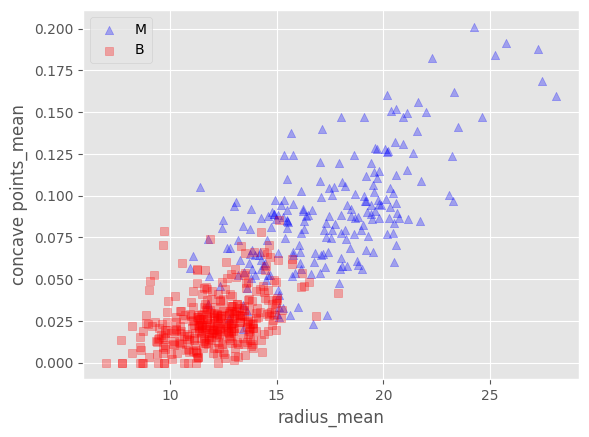

In [7]:
colors = ['blue', 'red']
markers = ['^', 's']
for i, diagnosis in enumerate(['M', 'B']):
    data = breast_2[breast_2['diagnosis'] == diagnosis]
    plt.scatter(data['radius_mean'],
                data['concave points_mean'],
                c=colors[i],
                marker=markers[i],
                alpha=0.3, label=diagnosis)

plt.legend()
plt.xlabel('radius_mean')
plt.ylabel('concave points_mean')
plt.show()

### Decision-tree Diagram

In [8]:
breast_2['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [9]:
breast_2 = breast_2.copy()
breast_2['diagnosis'] = breast_2['diagnosis'].map({'M': 1, 'B': 0}).astype(int)
breast_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   radius_mean          569 non-null    float64
 1   concave points_mean  569 non-null    float64
 2   diagnosis            569 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 13.5 KB


In [10]:
X = breast_2.drop('diagnosis', axis=1)
y = breast_2['diagnosis']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 2), (114, 2), (455,), (114,))

In [12]:
d_tree = DecisionTreeClassifier(max_depth=2, random_state=1)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

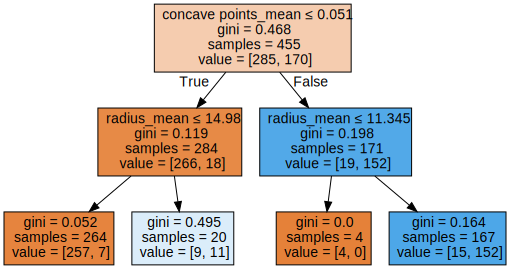

In [13]:
graphviz.Source(
    export_graphviz(d_tree,
                    out_file=None,
                    feature_names = X.columns,
                    filled=True,
                    special_characters=True)
)

In [14]:
y_pred = d_tree.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1])

In [15]:
accuracy_score(y_train, d_tree.predict(X_train))

0.9318681318681319

In [16]:
((y_pred == y_test).sum() / len(y_pred)).item()

0.9035087719298246

In [17]:
accuracy_score(y_test, y_pred)

0.9035087719298246

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


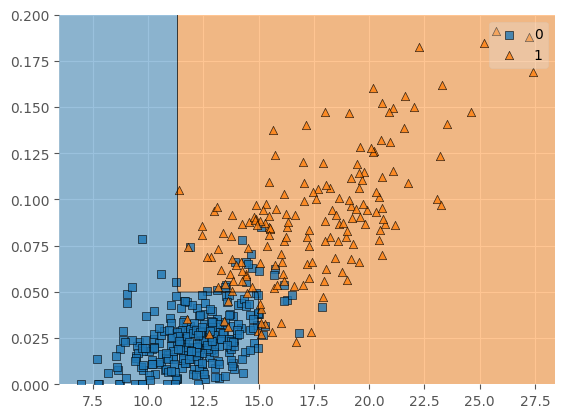

In [18]:
plot_decision_regions(X_train.values, y_train.values, clf=d_tree)
plt.ylim(0, 0.2)
plt.show()

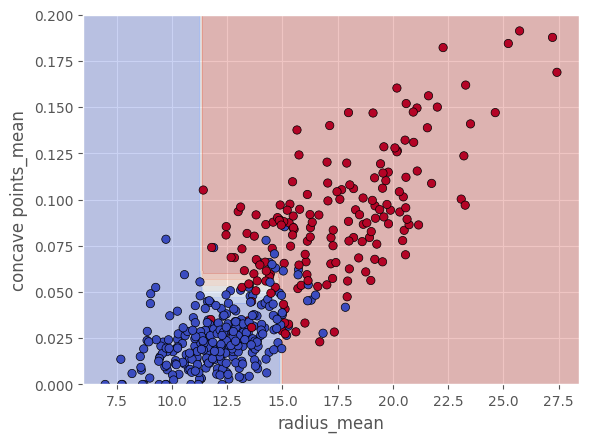

In [19]:
disp = DecisionBoundaryDisplay.from_estimator(
    d_tree,
    X_train,
    response_method='predict',
    alpha=0.3,
    cmap='coolwarm'
)
disp.ax_.scatter(X_train['radius_mean'], X_train['concave points_mean'], c=y_train, edgecolor='k', cmap='coolwarm')
plt.ylim(0, 0.2)
plt.show()

- Note that CART (Classification and Regression Trees) don't have a straight line decision boundary, it produces rectangular decision regions in the feature space
    - That is because, at each split made by the tree, only one feature is involved

### Train your first classification tree: `max_depth=6`

In [20]:
SEED = 1

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 0 0 1 0]


In [21]:
accuracy_score(y_train, dt.predict(X_train))

0.9758241758241758

In [22]:
# not as accurate as when there was max_depth=2
accuracy_score(y_test, y_pred)

0.8859649122807017

- When we used max_depth=2
    - training accuracy: 0.9035087719298246
    - testing accuracy: 0.9035087719298246
- When se use max_depth=6
    - training accuracy: 0.9758241758241758
    - testing accuarcy: 0.8859649122807017

Increasing `max_depth` increases the risk of overfitting

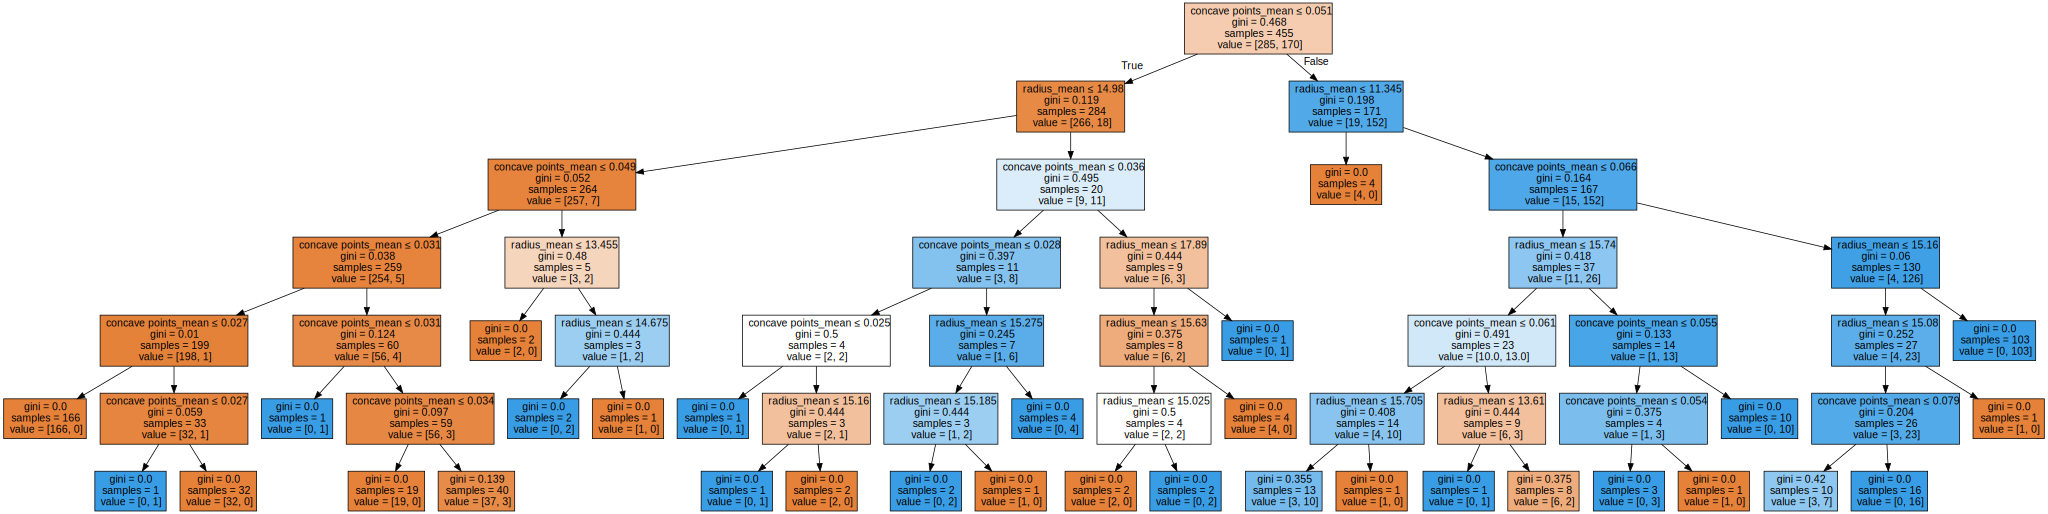

In [23]:
graphviz.Source(
    export_graphviz(dt,
                    out_file=None,
                    feature_names = X_train.columns,
                    filled=True,
                    special_characters=True)
)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


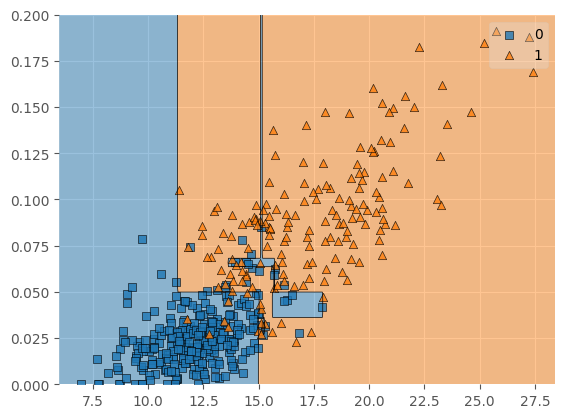

In [24]:
plot_decision_regions(X_train.values, y_train.values, clf=dt)
plt.ylim(0, 0.2)
plt.show()

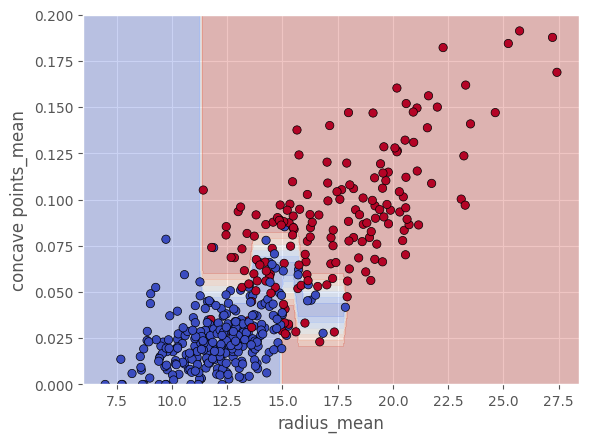

In [25]:
disp = DecisionBoundaryDisplay.from_estimator(
    dt,
    X_train,
    response_method='predict',
    alpha=0.3,
    cmap='coolwarm'
)
disp.ax_.scatter(X_train['radius_mean'], X_train['concave points_mean'], c=y_train, edgecolor='k', cmap='coolwarm')
plt.ylim(0, 0.2)
plt.show()

### Logistic regression vs classification tree

In [26]:
# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

LogisticRegression(random_state=1)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


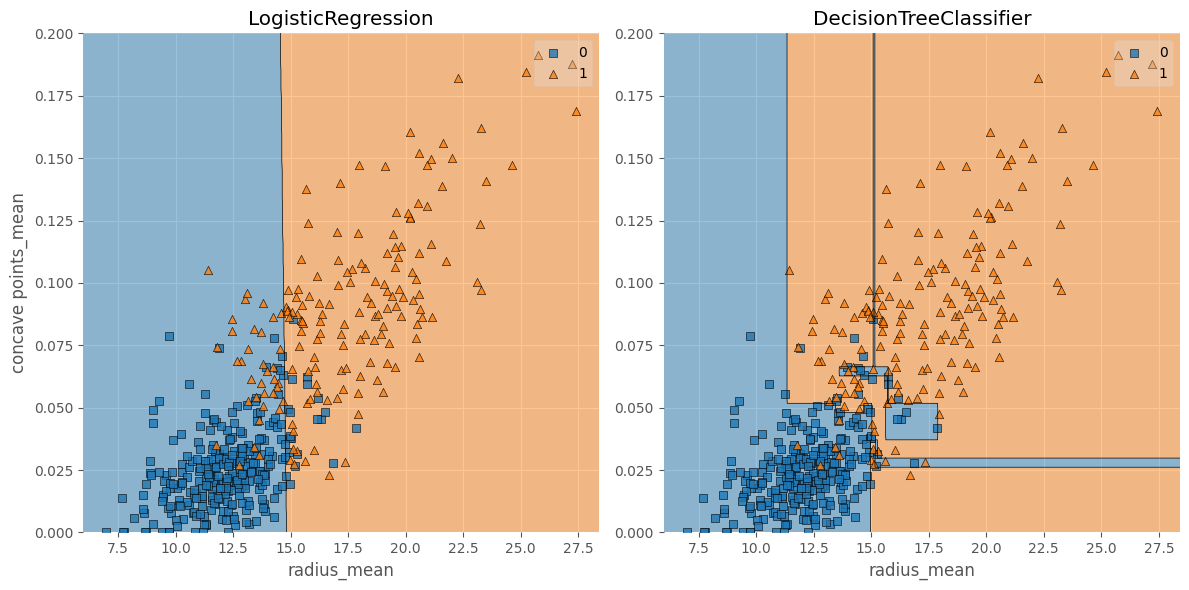

In [27]:
clfs = [logreg, dt]
titles = ['LogisticRegression', 'DecisionTreeClassifier']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, clf in enumerate(clfs):
    plot_decision_regions(X_train.values,
                          y_train.values,
                          clf=clf,
                          ax=axes[i])
    axes[i].set_ylim(0, 0.2)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('radius_mean')
    if i == 0: axes[i].set_ylabel('concave points_mean')

plt.tight_layout()
plt.show()

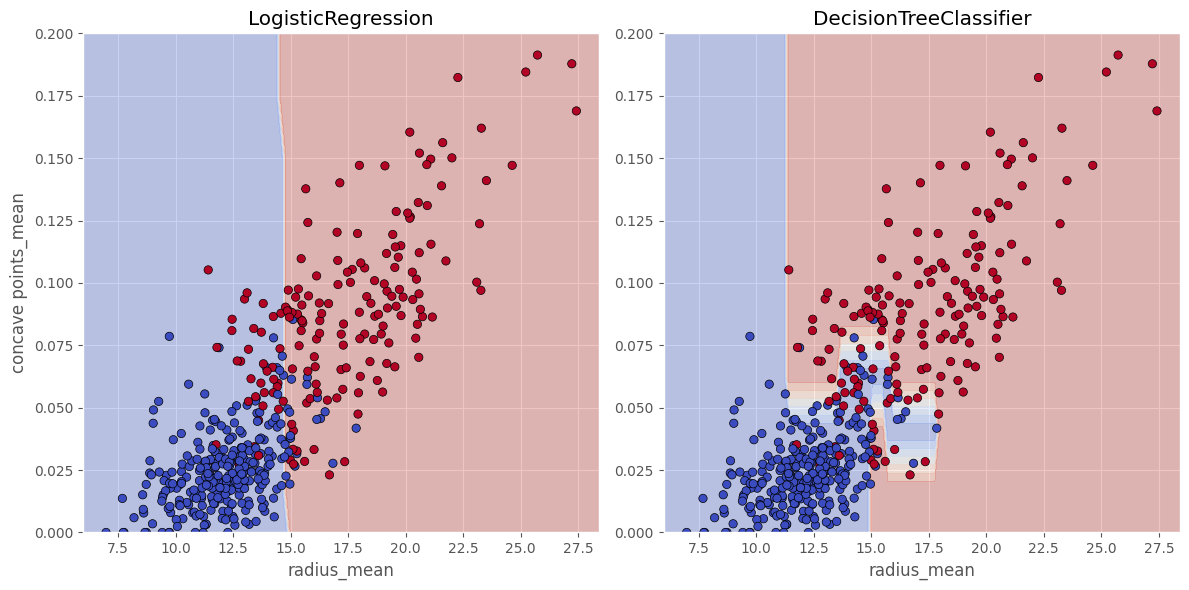

In [28]:
clfs = [logreg, dt]
titles = ['LogisticRegression', 'DecisionTreeClassifier']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, clf in enumerate(clfs):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        response_method='predict',
        alpha=0.3,
        cmap='coolwarm',
        ax=axes[i]
    )
    disp.ax_.scatter(X_train['radius_mean'], X_train['concave points_mean'], c=y_train, edgecolor='k', cmap='coolwarm')
    axes[i].set_ylim(0, 0.2)
    axes[i].set_title(titles[i])
    if i == 1: axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

## Classification tree Learning

### Building Blocks of a Decision-Tree

- **Decision-Tree**: data structure consisting of a hierarchy of nodes
- **Node**: question or prediction
- Three types of node:
    - **Root node**: has no parent node, question giving rise to **two** child nodes
    - **Internal node**: has one parent node, question giving rise to **two** child nodes
    - **Leaf node**: has one parent node, no child nodes -> prediction


### Information Gain (IG)

- The nodes of a classification tree are grown recursively; the obtention of an internal node or leaf depends on the state of its predecessors
- To produce the purest leaves possible, a question is asked at each node involving feature ***f*** and split-point ***sp***

$$f \lt sp \;?$$

- This question splits into two branches $True$ and $False$

#### How does it know which $f$ and $sp$ to choose?

- It does so by maximizing **information gain**
- The tree considers that every node contains information and aims at maximizing the information gain obtained after each split
- The information gain for such a split is given by the following formula

$$
IG\left(f, sp\right) = I(parent) - \left(\frac{N_{left}}{N}\cdot I\left( left \right) + \frac{N_{right}}{N}\cdot I\left( right \right)\right)
$$

#### Criteria to measure the impurity of a node $I\left( node \right)$

- gini index
- entropy

### Classification-Tree Learning

- Nodes are grown recursively
- At each node, split the data based on:
  - Feature ***f*** and split-point ***sp*** to maximize $IG\left( node \right)$
- If $IG\left( node \right) = 0$, declare the node a **leaf**
- Keep in mind, these reults are for **unconstrained trees**
    - If you constrain the **maximum depth** of a tree to 2, for example, all nodes having a depth of 2 will be declared leaves even if the information gained by spitting such nodes is not null

### Infomation Criterion in scikit-learn

- You can set the information `criterion` in the DecisionTreeClassifer

```python
from sklearn.tree import $IG\left( node \right)$
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# S;pit the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=1
)

# instantiate dt and set `criterion` to 'gini'
dt = DecisionTreeClassifier(criterion='gini', random_state=1)

# fit `dt` to the training set
dt.fit(X_train, y_train)

# predict test-set labels
y_pred = dt.predict(X_test)

# evalute test-set accuracy
accuracy_score(y_test, y_pred)
```

### Using entropy as criterion

In [29]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [30]:
X = breast.drop('diagnosis', axis=1)
y = breast['diagnosis']
X.shape, y.shape

((569, 30), (569,))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [32]:
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

display(dt_entropy.fit(X_train, y_train))
display(dt_gini.fit(X_train, y_train))

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [33]:
y_pred_entropy = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

In [34]:
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print(f'Accuracy achieved by using entropy: {accuracy_entropy:.3f}')

# Print accuracy_gini
print(f'Accuracy achieved by using the gini index: {accuracy_gini:.3f}')

Accuracy achieved by using entropy: 0.930
Accuracy achieved by using the gini index: 0.930


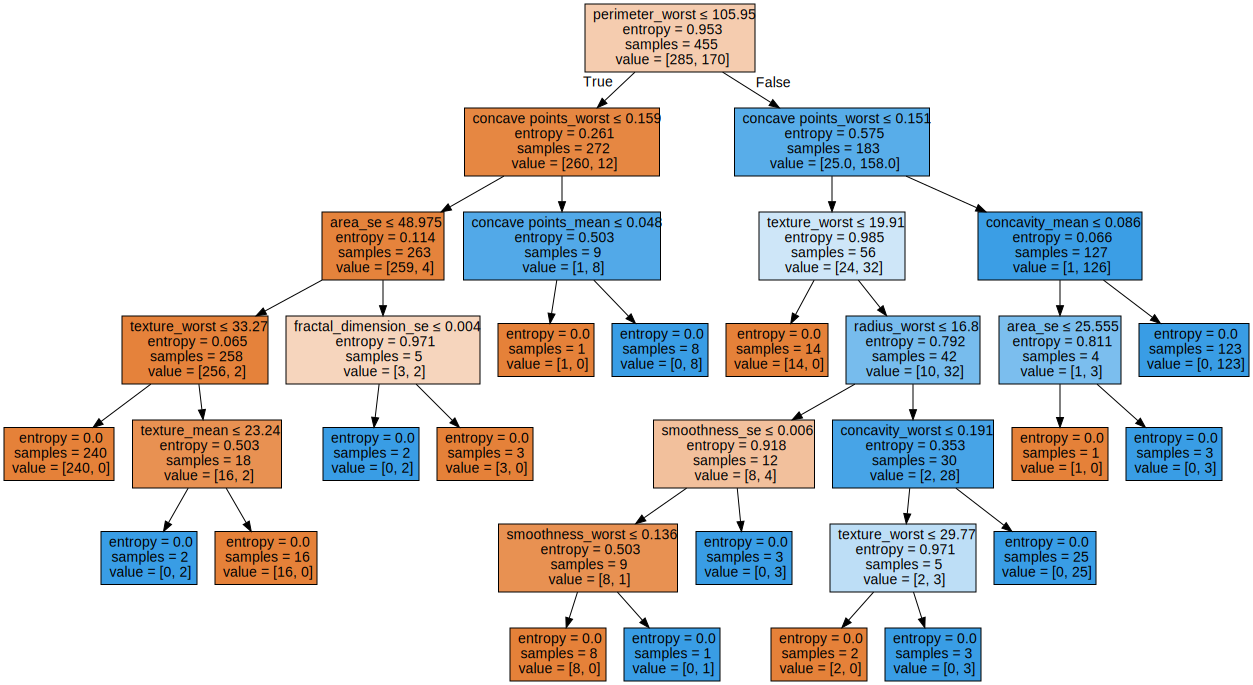

In [35]:
graphviz.Source(
    export_graphviz(dt_entropy,
                    out_file=None,
                    feature_names = X_train.columns,
                    filled=True,
                    special_characters=True)
)

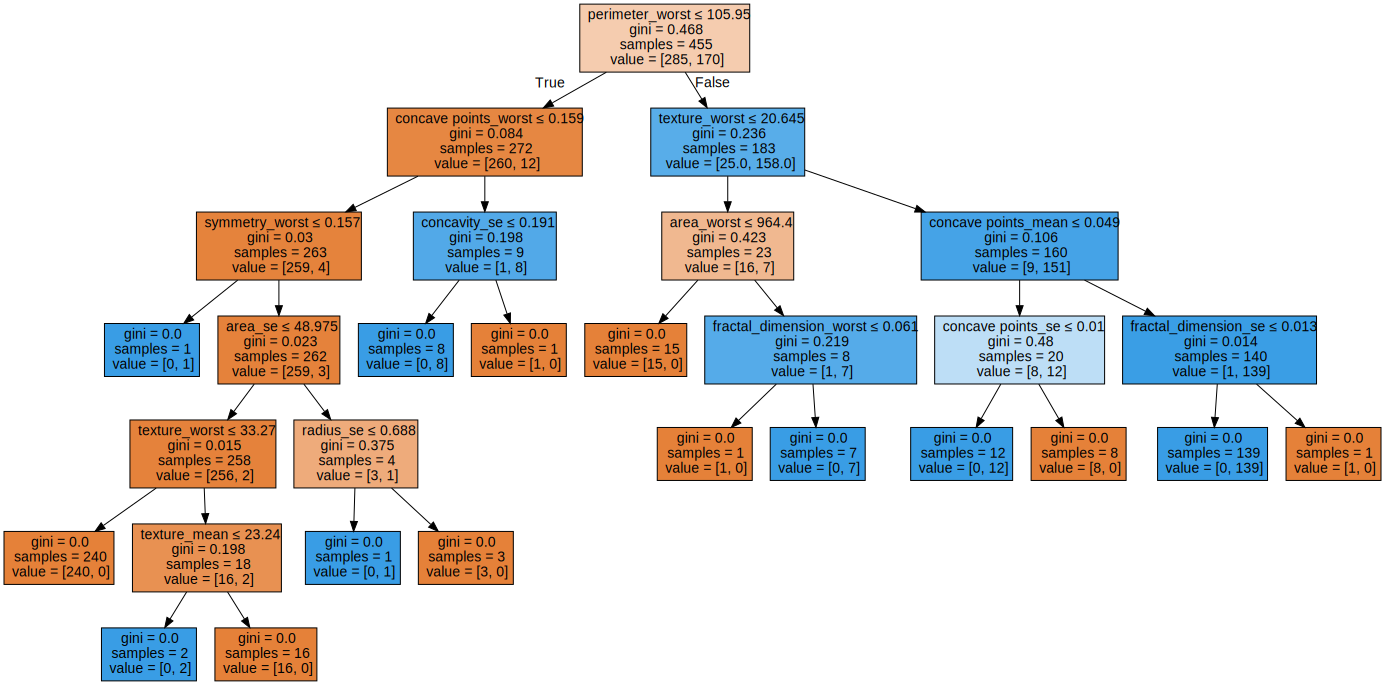

In [36]:
graphviz.Source(
    export_graphviz(dt_gini,
                    out_file=None,
                    feature_names = X_train.columns,
                    filled=True,
                    special_characters=True)
)

## Decision-Tree for Regression

In [37]:
auto.head(6)

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0
5,32.9,119.0,100,2615,14.8,Asia,10.0


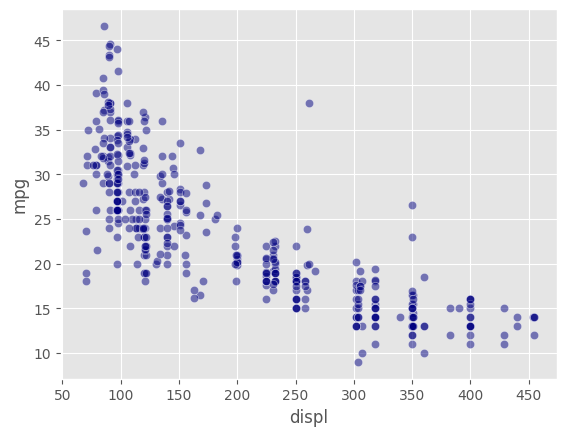

In [38]:
sns.scatterplot(data=auto, x='displ', y='mpg', color='navy', alpha=0.5)
plt.show()

- Note that linear models such as linear regression would not be able to capture such a **non-linear trend**.

In [39]:
X = auto.drop('mpg', axis=1)
y = auto['mpg']

In [40]:
X['origin'].value_counts()

,count
origin,
US,245
Asia,79
Europe,68


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=3
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 6), (79, 6), (313,), (79,))

In [42]:
preprocessor = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ['origin']),
    remainder='passthrough',
    force_int_remainder_cols=False
)

In [43]:
preprocessor.fit(X_train)

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['origin'])])

In [44]:
X_train_encoded = preprocessor.transform(X_train)

In [45]:
one_hot_columns = preprocessor.named_transformers_['onehotencoder'].get_feature_names_out()
numeric_columns = X_train.drop('origin', axis=1).columns
all_columns = np.concatenate([one_hot_columns, numeric_columns])
X_train = pd.DataFrame(
    X_train_encoded,
    columns=all_columns,
    index=X_train.index
)

X_train.head()

,origin_Asia,origin_Europe,origin_US,displ,hp,weight,accel,size
305,0.0,1.0,0.0,97.0,78.0,2190.0,14.1,10.0
338,0.0,0.0,1.0,140.0,86.0,2790.0,15.6,10.0
23,0.0,0.0,1.0,383.0,170.0,3563.0,10.0,20.0
214,0.0,0.0,1.0,258.0,110.0,3730.0,19.0,15.0
112,0.0,0.0,1.0,140.0,72.0,2401.0,19.5,10.0


In [46]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_squared_error as MSE

dt = DecisionTreeRegressor(max_depth=4,
                           min_samples_leaf=0.1, # each leaf must contain at least 10% of training data
                           random_state=3)
dt

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)

In [47]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)

In [48]:
X_test_encoded = preprocessor.transform(X_test)
X_test = pd.DataFrame(
    X_test_encoded,
    columns=all_columns,
    index=X_test.index
)

X_test.head()

,origin_Asia,origin_Europe,origin_US,displ,hp,weight,accel,size
352,0.0,1.0,0.0,163.0,125.0,3140.0,13.6,15.0
16,0.0,1.0,0.0,79.0,58.0,1825.0,18.6,10.0
288,0.0,0.0,1.0,318.0,140.0,4080.0,13.7,20.0
281,1.0,0.0,0.0,70.0,97.0,2330.0,13.5,7.5
201,0.0,1.0,0.0,68.0,49.0,1867.0,19.5,10.0


In [49]:
y_pred = dt.predict(X_test)
y_pred

array([23.41875   , 28.7       , 15.31904762, 26.23023256, 28.7       ,
       19.66491228, 28.7       , 26.23023256, 15.31904762, 19.66491228,
       13.25714286, 23.41875   , 28.7       , 15.31904762, 19.66491228,
       23.41875   , 15.31904762, 30.95      , 30.95      , 19.66491228,
       19.66491228, 19.66491228, 15.31904762, 33.735     , 23.41875   ,
       13.25714286, 28.7       , 23.41875   , 19.66491228, 28.7       ,
       33.735     , 23.41875   , 26.23023256, 33.735     , 28.7       ,
       19.66491228, 30.95      , 13.25714286, 15.31904762, 30.95      ,
       15.31904762, 19.66491228, 33.735     , 23.41875   , 15.31904762,
       15.31904762, 13.25714286, 19.66491228, 19.66491228, 19.66491228,
       13.25714286, 26.23023256, 19.66491228, 26.23023256, 26.23023256,
       30.95      , 19.66491228, 26.23023256, 26.23023256, 15.31904762,
       13.25714286, 28.7       , 33.735     , 23.41875   , 28.7       ,
       28.7       , 19.66491228, 19.66491228, 19.66491228, 13.25

In [50]:
mse_dt = MSE(y_test, y_pred)
mse_dt

22.06221149817197

In [51]:
rmse_dt = mse_dt**(1/2)
rmse_dt

4.697042846107747

### Information Criterion for Regression-Tree

- $I$ is the impurity
- $MSE$ is mean-squared-error

$$
I\left( node \right) = MSE\left( node \right) = \frac{1}{N_{node}}\sum_{i \in node}\left( y^{(i)} - \widehat{y}_{node}\right)^{2}
$$

- $\widehat{y}_{node}$ is the mean-target-value

$$
\widehat{y}_{node} = \frac{1}{N_{node}}\sum_{i \in node} y^{(i)}
$$

- This means that the regression tree tries to find the splits that produce leaves where, in each leaf, the target values are on average, the closest possible to the mean-value of the labels in that particular leaf





### Prediction

- As a new instance traverses the tree and reaches a certain leaf, its target-variable $y$ is compuated as the average of the target-variables contained in that leaf as shown in this formula

$$
\widehat{y}_{pred}\left( leaf \right) = \frac{1}{N_{leaf}}\sum_{i \in leaf}y^{(i)}
$$

### Linear Regression vs. Regression-Tree

- The following figure highlights the importance of the flexibility of regression trees.

<img src='https://drive.google.com/uc?export=view&id=1G1zIngQx4R_o7beT5cKgE1TXq4-Tx2mO'>

In [52]:
X_displ = auto[['displ']]
y_target = auto['mpg']

In [53]:
lr_test = LinearRegression()
dt_test = DecisionTreeRegressor(max_depth=2)

display(lr_test.fit(X_displ, y_target))
display(dt_test.fit(X_displ, y_target))

LinearRegression()

DecisionTreeRegressor(max_depth=2)

In [54]:
lr_fitted = lr_test.predict(X_displ)
dt_fitted = dt_test.predict(X_displ)

In [55]:
X_sorted = X_displ.sort_values(by='displ')
dt_fitted_sorted = dt_fitted[X_sorted.index]

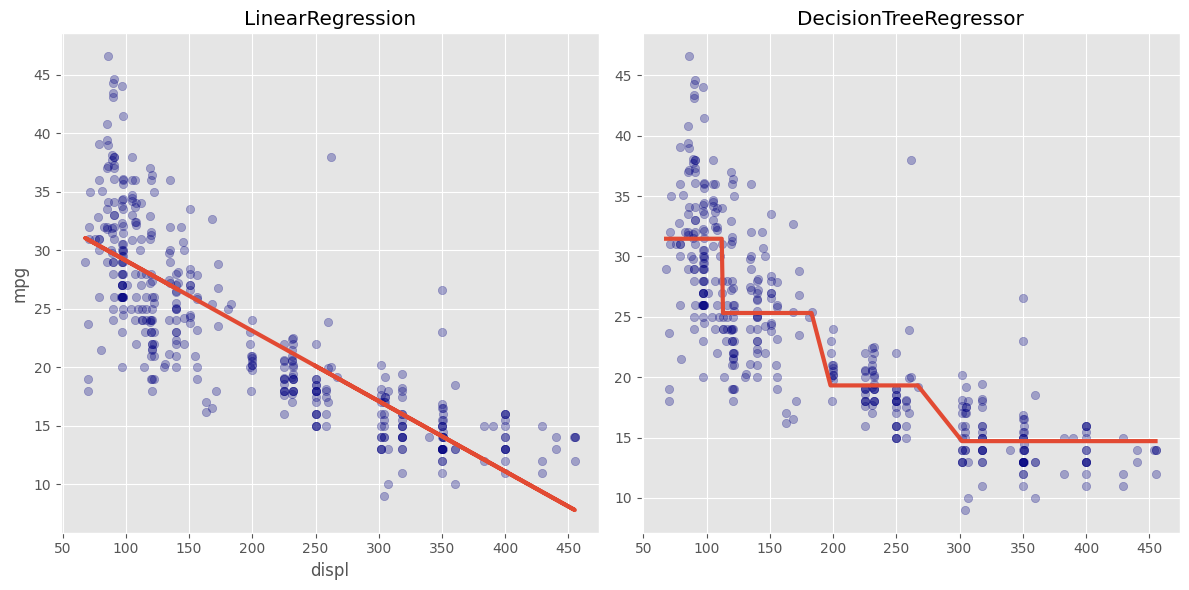

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(X_displ, y_target, color='navy', alpha=0.3)
axes[0].plot(X_displ, lr_fitted, linewidth=3)
axes[0].set_title('LinearRegression')

axes[1].scatter(X_displ, y_target, color='navy', alpha=0.3)
axes[1].plot(X_sorted, dt_fitted_sorted, linewidth=3)
axes[1].set_title('DecisionTreeRegressor')

axes[0].set_xlabel('displ')
axes[0].set_ylabel('mpg')
axes[0].set_xlabel('displ')

plt.tight_layout()
plt.show()

In [57]:
# compare RMSE
MSE(y_target, lr_fitted)**(1/2), MSE(y_target, dt_fitted)**(1/2)

(4.623261288321768, 4.234258651997915)

### Train your first regression tree

In [58]:
X_train.head()

,origin_Asia,origin_Europe,origin_US,displ,hp,weight,accel,size
305,0.0,1.0,0.0,97.0,78.0,2190.0,14.1,10.0
338,0.0,0.0,1.0,140.0,86.0,2790.0,15.6,10.0
23,0.0,0.0,1.0,383.0,170.0,3563.0,10.0,20.0
214,0.0,0.0,1.0,258.0,110.0,3730.0,19.0,15.0
112,0.0,0.0,1.0,140.0,72.0,2401.0,19.5,10.0


In [59]:
X_test.head()

,origin_Asia,origin_Europe,origin_US,displ,hp,weight,accel,size
352,0.0,1.0,0.0,163.0,125.0,3140.0,13.6,15.0
16,0.0,1.0,0.0,79.0,58.0,1825.0,18.6,10.0
288,0.0,0.0,1.0,318.0,140.0,4080.0,13.7,20.0
281,1.0,0.0,0.0,70.0,97.0,2330.0,13.5,7.5
201,0.0,1.0,0.0,68.0,49.0,1867.0,19.5,10.0


In [60]:
y_train.head()

,mpg
305,30.5
338,27.0
23,15.0
214,15.0
112,21.0


In [61]:
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [62]:
# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.37


### Linear regression vs. regression-tree

In [63]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [64]:
# Predict test set labels
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

In [65]:
# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 5.10
Regression Tree test set RMSE: 4.37
